In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise = 3)

In [6]:
X

array([[ 0.41714321, -0.96259865],
       [ 0.49022398,  2.87030759],
       [-0.25786602,  0.20140095],
       ...,
       [ 2.22797821,  0.18540737],
       [ 1.61823637,  0.47073431],
       [ 1.12515032,  0.7241215 ]])

In [8]:
y

array([ 2.10416801e+01,  1.09016690e+02, -1.75121450e+01,  1.06467290e+02,
       -4.46497467e+01,  6.30943013e+01,  1.36810748e+02, -1.66181337e+02,
        1.40727596e+02,  1.64041636e+02,  5.11516338e+01, -2.29570020e+01,
        1.11572144e+02, -3.50873941e+01, -7.28424561e+01,  1.78145402e+01,
       -2.19551915e+02,  1.22448871e+02, -2.13622669e+01, -1.57435786e+02,
       -5.87062031e+01, -2.92676545e+01,  2.42928088e+02,  2.21033685e+01,
       -1.49879923e+02, -7.33574165e+01,  1.32761440e+02,  3.93044202e+01,
       -2.48960705e+02, -3.79658373e+01,  3.39173122e+01,  2.33001960e+01,
       -1.16351997e+02, -1.09571181e+02,  1.51602652e+01, -5.91113038e+01,
       -2.81946895e+01,  1.04805984e+02, -9.20298837e+00, -3.64931841e+01,
       -1.12188398e+02, -6.05222692e+01,  6.93122659e+01,  1.79965039e+01,
        1.57056615e+02,  1.98127733e+01, -7.38318628e+01,  1.03605863e+02,
       -2.32589224e+01,  1.72913185e+02,  5.50430198e+01,  9.22345158e+01,
        7.51136338e+01,  

In [12]:
pd.DataFrame(X)[0]

0      0.417143
1      0.490224
2     -0.257866
3      0.526061
4     -0.275108
         ...   
995    0.662914
996   -0.505749
997    2.227978
998    1.618236
999    1.125150
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

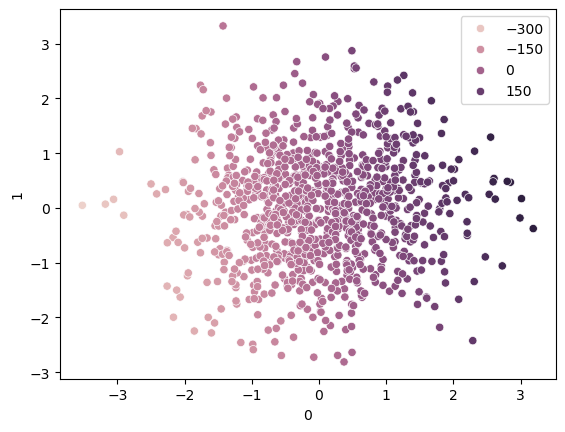

In [14]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [18]:
X_train.shape, X_test.shape

((700, 2), (300, 2))

In [20]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')

In [22]:
svr

SVR(kernel='linear')

In [24]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [26]:
svr.coef_

array([[95.44344523, 23.51572965]])

In [28]:
y_pred = svr.predict(X_test)
y_pred

array([ 9.44383741e+00,  3.18531537e+00, -2.92874409e+01, -4.84569592e+01,
        7.10136163e+01, -9.02974085e+01, -1.55131897e+02,  6.14909677e+01,
        7.24407091e+01,  1.71228694e+02, -7.97774943e+01,  4.58244765e+01,
       -5.81541091e+01, -1.50152879e+01, -7.73911672e+01,  5.61373379e+01,
        1.14707357e+02,  1.32603478e+02, -6.91243340e+01, -8.81743354e+01,
       -1.46475262e+01, -1.16413834e+02,  4.06832013e+01, -5.47464731e+01,
       -1.73393728e+01, -1.35962792e+02, -2.19881694e+02, -3.01366463e+01,
        6.28763362e+01,  1.41007660e+02, -1.30193691e+02, -1.05974452e+01,
       -1.36441216e+02,  4.51951870e+01, -1.57926599e+02,  9.43655850e+01,
       -4.88378364e+01,  1.23472012e+01,  9.69108562e+01,  6.33454613e+01,
       -3.77448644e+01, -1.03398086e+02, -8.20324281e+01, -3.70095817e+01,
       -3.33886468e+01,  3.52751401e+01,  8.95419318e+00, -5.59670625e+01,
        3.75822257e+01,  6.85585065e+01, -8.17267518e+01,  1.90368017e+01,
       -2.47011044e+01, -

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9990207378090847

In [32]:
#hyperparameter tuning with SVR
from sklearn.model_selection import GridSearchCV
params = {'C': [ 1, 2, 3, 10, 50, 120, 100],
         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
         'kernel': ['linear'],
         'epsilon': [0.01, 0.1, 0.2, 0.3]}

grid = GridSearchCV(SVR(), param_grid = params, cv=5, verbose=3)
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [34]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.01, gamma=0.1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.01, gamma=0.2, kern

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2, 3, 10, 50, 120, 100],
                         'epsilon': [0.01, 0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [36]:
grid.best_params_

{'C': 10, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [38]:
grid.best_score_

0.999087319253816

In [40]:
final_model = grid.best_estimator_

In [42]:
y_pred = final_model.predict(X_test)

In [44]:
r2_score(y_test, y_pred)

0.9990461756806064